In [1]:
import glob
import numpy as np 
import time
import math
import random
from scipy import linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt
from termcolor import colored

In [2]:
def read_file(file_name):
    data = []
    Data = []
    flag = True
    with open(file_name, "r") as f:
        for line in f:
            item = line.strip().split("|")
            if flag == True and len(item) == 5:
                data.append([float(item[0]), float(item[1])])
                Data.append([float(item[3]), float(item[4])])
                flag = False
            elif flag == True and len(item) == 6:
                data.append([float(item[0]), float(item[1])])
                Data.append([float(item[3]), float(item[4])])
                flag = False
            else:
                flag = True
    return np.array(data), np.array(Data)

In [3]:
P1 = glob.glob('gpsdata/person1/**/', recursive=True)[1:]
P2 = glob.glob('gpsdata/person2/**/', recursive=True)[1:]
I1 = glob.glob('gpsdata/person1/**/*.txt', recursive=True)
I2 = glob.glob('gpsdata/person2/**/*.txt', recursive=True)

In [4]:
A = pd.read_csv(I1[0], header=None, delimiter="|")
np.array(A)

array([[4151.7448, 8739.0343, ' -5:09:12 ', 221.635987, 358.560798],
       [4151.7404, 8739.0384, ' -5:09:22 ', 221.632501, 358.555709],
       [4151.7418, 8739.0387, ' -5:09:23 ', 221.63223100000002,
        358.557317],
       ...,
       [4147.5155, 8806.6687, ' -5:43:28 ', 197.887199, 353.570877],
       [4147.5141, 8806.6688, ' -5:43:29 ', 197.887118,
        353.56926699999997],
       [4147.5126, 8806.6689, ' -5:43:30 ', 197.88703600000002, 353.5675]],
      dtype=object)

In [5]:
len(P1), len(P2), len(I1), len(I2), len(I1)/len(I2)

(68, 35, 124, 89, 1.3932584269662922)

In [6]:
data1_lan_long = [0] * len(I1) # trajectories in lan,long-coordinates
data1_x_y = [0] * len(I1) # trajectories in projected x,y-coordinate
data2_lan_long = [0] * len(I2) # trajectories in lan,long-coordinates
data2_x_y = [0] * len(I2) # trajectories in projected x,y-coordinate

for i in range(len(I1)):
    z =read_file(I1[i])
    data1_lan_long[i] = z[0]
    data1_x_y[i] = z[1]

for i in range(len(I2)):
    z =read_file(I2[i])
    data2_lan_long[i] = z[0]
    data2_x_y[i] = z[1]
    
data1_lan_long = np.array(data1_lan_long, dtype = 'object')
data1_x_y = np.array(data1_x_y, dtype = 'object')
data2_lan_long = np.array(data2_lan_long, dtype = 'object')
data2_x_y = np.array(data2_x_y, dtype = 'object')

In [7]:
data1_lan_long = data1_x_y
data2_lan_long = data2_x_y

In [8]:
len(data1_lan_long), len(data2_lan_long)

(124, 89)

In [9]:
def remove_segments(traj): # removes stationary points
    p2 = traj[1:]
    p1 = traj[:-1]
    L = ((p2-p1)*(p2-p1)).sum(axis =1)
    I = np.where(L>1e-16)[0]
    return traj[I]

In [10]:
data1_lan_long = np.array([remove_segments(data1_lan_long[i]) for i in range(len(data1_lan_long))])

data2_lan_long = np.array([remove_segments(data2_lan_long[i]) for i in range(len(data2_lan_long))])

len(data1_lan_long), len(data2_lan_long)

/Users/hasan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/Users/hasan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


(124, 89)

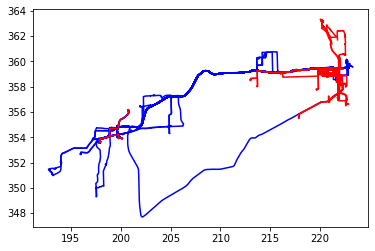

In [11]:
for i in range(len(data1_lan_long)):
    plt.plot(data1_lan_long[i][:,0], data1_lan_long[i][:,1], color='blue')
for i in range(len(data2_lan_long)):
    plt.plot(data2_lan_long[i][:,0], data2_lan_long[i][:,1], color='red')
plt.savefig(f'/Users/hasan/Desktop/Anaconda/Research/Pictures for 2ed paper/Two persons data.png', 
            bbox_inches='tight', dpi=200)
plt.show()

In [12]:
min_x, min_y = np.min((np.min([np.min(data1_lan_long[i], axis=0) for i in range(len(data1_lan_long))], axis=0), 
               np.min([np.min(data2_lan_long[i], axis=0) for i in range(len(data2_lan_long))], axis=0)), axis=0)
  
max_x, max_y = np.max((np.max([np.max(data1_lan_long[i], axis=0) for i in range(len(data1_lan_long))], axis=0), 
               np.max([np.max(data2_lan_long[i], axis=0) for i in range(len(data2_lan_long))], axis=0)), axis=0)

print("length and width:", np.round(max_x - min_x, decimals=2), 
      np.round(max_y - min_y, decimals=2))
print(len(data1_lan_long), len(data2_lan_long))

length and width: 30.53 15.64
124 89
